#### Los datos fueron sustraidos de: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset

## Definicion de problema

El objetivo de este trabajo es lograr predecir la cantidad de calorias quemadas durante un entrenamiento de gimnasio. Para esto contamos con una base de datos la cual contiene atributos como: edad, genero, tipo de ejercicio, nivel de experiencias, entre otras. Primero revisaremos nuestra data con el fin de normalizar ciertos datos y ademas de categorizar otros. Gracias a esto observaremos la correlacion que tienen con nuestro atributo objetivo. Luego de esto empezaremos con el proceso de crear nuestra regrecion, dentro de esto revisaremos que regresores son los más utiles con tecnicas vistas en clases y/o tareas anteriores. Finalmente evaluaremos que tan eficiente es nuestro algoritmo de prediccion.

La importancia que tiene este trabajo es poder entregar de manera eficaz el consumo de calorias de un individuo de acorde a sus condiciones fisicas y el tipo de ejercicio que hace. Es muy util tener en cuenta esta informacion al momento de realizar una actividad fisica, ya que esta puede afectar al estimulo que rewsive el musculo, la alimentacion y la recuperacion de la persona la cual estamos evaluando

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Limpieza de datos

In [2]:
df = pd.read_csv('gym_members_exercise_tracking.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [3]:
df = pd.get_dummies(df, columns=['Workout_Type'], drop_first=True)
#Workout_Type_HIIT; Workout_Type_Strength; Workout_Type_Yoga. Si las 3 son False, entonces es Cardio.

LE = LabelEncoder()
df["Gender"] = LE.fit_transform(df['Gender'])

df["Calories_Burned"] = df["Calories_Burned"].astype(int)
df[['Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga']] = df[['Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga']].astype(int)
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,1,88.3,1.71,180,157,60,1.69,1313,12.6,3.5,4,3,30.20,0,0,1
1,46,0,74.9,1.53,179,151,66,1.30,883,33.9,2.1,4,2,32.00,1,0,0
2,32,0,68.1,1.66,167,122,54,1.11,677,33.4,2.3,4,2,24.71,0,0,0
3,25,1,53.2,1.70,190,164,56,0.59,532,28.8,2.1,3,1,18.41,0,1,0
4,38,1,46.1,1.79,188,158,68,0.64,556,29.2,2.8,3,1,14.39,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,1,87.1,1.74,187,158,67,1.57,1364,10.0,3.5,4,3,28.77,0,1,0
969,25,1,66.6,1.61,184,166,56,1.38,1260,25.0,3.0,2,1,25.69,0,1,0
970,59,0,60.4,1.76,194,120,53,1.72,929,18.8,2.7,5,3,19.50,0,0,0
971,32,1,126.4,1.83,198,146,62,1.10,883,28.2,2.1,3,2,37.74,1,0,0


In [4]:
df.describe()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
count,973.000000,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,0.525180,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127,0.227133,0.265159,0.245632
std,12.180928,0.499622,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879,0.419194,0.441645,0.430683
min,18.000000,0.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000,0.000000,0.000000,0.000000
50%,40.000000,1.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000,0.000000,0.000000,0.000000
75%,49.000000,1.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000,0.000000,1.000000,0.000000
max,59.000000,1.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000,1.000000,1.000000,1.000000


Vemos que todos los valores estan en rangos comunes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    int64  
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    int64  
 9   Fat_Percentage                 973 non-null    float64
 10  Water_Intake (liters)          973 non-null    float64
 11  Workout_Frequency (days/week)  973 non-null    int64  
 12  Experience_Level               973 non-null    int

## Ahora veamos las correlaciones entre variables

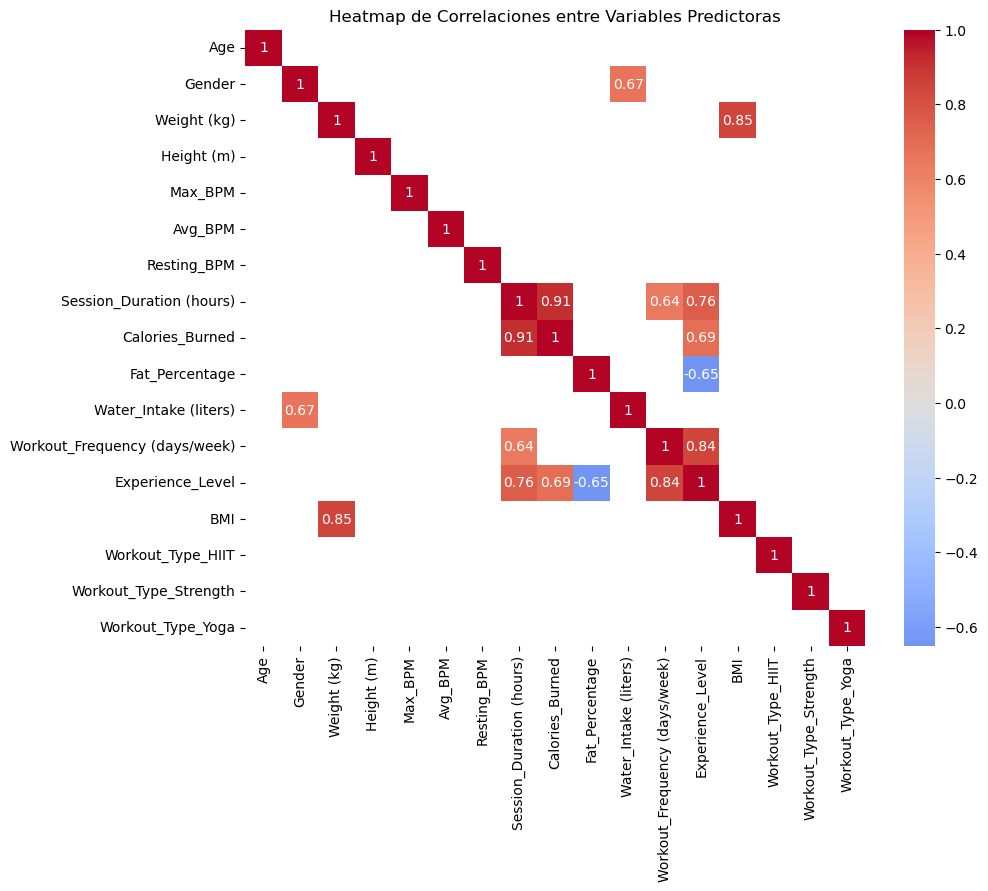

In [6]:
correlation_matrix = df.corr().round(2)
correlation_matrix = correlation_matrix.where(np.abs(correlation_matrix) > 0.6)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de Correlaciones entre Variables Predictoras')
plt.show()

Vemos que lo que más correlación tiene con las calorías quemadas, es la duración del entrenamiento y el nivel de experiencia, pero estas estan altamente correlacionadas entre si, por lo tanto después de elegir las variables a utilizar en el modelo, es recomendable asegurarse que no esten altamente correlacionadas.

# 1. Análisis Estadístico de las Variables.

El modelo en el que se va a basar este proyecto es el de una regresión lineal múltiple, donde para una muestra de tamaño $n$ se busca encontrar una relación
$$Y_i = \beta_0 + \beta_1 X_{1i} + \beta_1 X_{1i} + \dots + \beta_1 X_{ki} + \epsilon_i \hspace{1cm}\forall i = 1, \dots, n$$
donde $\epsilon_i \sim N(0,\sigma^2)$ $\forall i = 1, \dots, n$.

Definimos, nuestro $Y$ y nuestros regresores, en una matriz.

In [7]:
Y = df['Calories_Burned'].to_numpy().reshape(-1,1)

X = df.drop(columns=['Calories_Burned'], inplace=False).to_numpy()
X = np.hstack([np.ones_like(Y), X]) # Para el beta_0
X

array([[ 1., 56.,  1., ...,  0.,  0.,  1.],
       [ 1., 46.,  0., ...,  1.,  0.,  0.],
       [ 1., 32.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 1., 59.,  0., ...,  0.,  0.,  0.],
       [ 1., 32.,  1., ...,  1.,  0.,  0.],
       [ 1., 46.,  1., ...,  0.,  1.,  0.]])

# 2. Significancia y aporte.
Como notamos hay 16 regresores pero no estamos seguros de que todos son significativos al explicar la varianza de `Calories_Burned`, así que haremos es una estrategia `backwards` donde entrenaremos una regresión lineal multiple con todos los regresores e iremos eliminando uno a uno mediante el `valor-p` del `t-test`.

In [8]:
import statsmodels.api as sm # pip install statsmodels

In [9]:
X_idx_final = np.arange(17).tolist()
while True:
    model = sm.OLS(Y, X[:,X_idx_final]).fit()
    p_vals = model.pvalues
    peor_reg_idx = np.argmax(p_vals)
    if p_vals[peor_reg_idx] <= 0.05: # 5% de significancia
        break
    print(f"Peor regresor id: {X_idx_final[peor_reg_idx]}")
    X_idx_final.pop(peor_reg_idx)
    print(f"R^2 ajustado: {round(model.rsquared_adj,3)}\n")

f"Regresores finales significativos: {X_idx_final}"

Peor regresor id: 14
R^2 ajustado: 0.979

Peor regresor id: 5
R^2 ajustado: 0.979

Peor regresor id: 10
R^2 ajustado: 0.979

Peor regresor id: 15
R^2 ajustado: 0.979

Peor regresor id: 12
R^2 ajustado: 0.979

Peor regresor id: 11
R^2 ajustado: 0.979

Peor regresor id: 9
R^2 ajustado: 0.979

Peor regresor id: 16
R^2 ajustado: 0.979



'Regresores finales significativos: [0, 1, 2, 3, 4, 6, 7, 8, 13]'

In [10]:
X_idx_final.pop(0) # Quitar el intercepto
X_idx_final = [i-1 for i in X_idx_final] # pasar a indices 
X_idx_final

[0, 1, 2, 3, 5, 6, 7, 12]

In [ ]:
X_final = df.iloc[:, X_idx_final]
X_final

,Age,Gender,Weight (kg),Height (m),Avg_BPM,Resting_BPM,Session_Duration (hours),Experience_Level
0,56,1,88.3,1.71,157,60,1.69,3
1,46,0,74.9,1.53,151,66,1.30,2
2,32,0,68.1,1.66,122,54,1.11,2
3,25,1,53.2,1.70,164,56,0.59,1
4,38,1,46.1,1.79,158,68,0.64,1
...,...,...,...,...,...,...,...,...
968,24,1,87.1,1.74,158,67,1.57,3
969,25,1,66.6,1.61,166,56,1.38,1
970,59,0,60.4,1.76,120,53,1.72,3
971,32,1,126.4,1.83,146,62,1.10,2


# 3. Regresión Final.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 29.0543622089339
MSE: 1532.3256711662627
RMSE: 39.1449316152968
R²: 0.9797916731990421


## Responder preguntas:

* ¿Por qué era adecuado el trabajo realizado para mi proyecto?

Es un tema interesante, que gusta a todos los miembros del grupo, y tenemos un buen volumen de datos para ver y aprender como funcionan las regeresiones y como interactuan las variables

* ¿Que limitaciones tiene mi analisis?

Al ser datos sinteticos, aunque se ajusten a la realidad, no siempre es lo mejor, sería bueno tener datos de este estilo en gimnasios chilenos

* ¿Necesito más datos?

Sería interesante tener más datos de los individuos, para ver como influyen esas variables con las calorías quemadas, pero no aportarían mucho al regresor

* ¿Necesito más analisis?

No creemos que sea necesario más analisis de las variables, pero se podría revisar la correlación parcial entre algunas variables, para sacar más conclusiones